In [5]:
import sys
sys.path.append('../..')
from torchuq.metric.point import *
import numpy as np
import torch
from matplotlib import pyplot as plt

In [6]:
n_sample = 200
dist = torch.distributions.normal.Normal(loc=torch.linspace(0, 4, n_sample), scale=torch.ones(n_sample))
predictions = dist.sample()
labels = dist.sample()

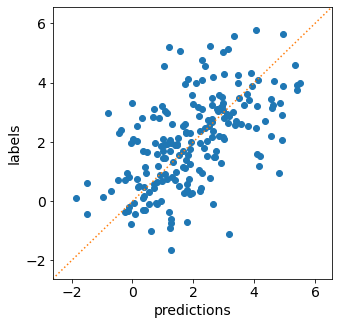

In [7]:
plot_scatter(predictions, labels)

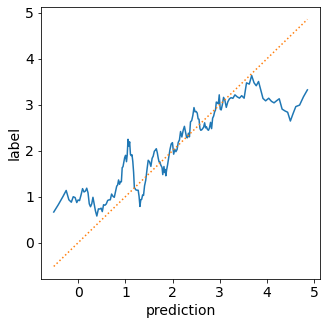

In [8]:
# Input a regression model and a pair of data, output the total error and binned error
# If axis=label computes the label conditional bias, if axis=prediction computes the prediction conditional bias
from torch.nn import functional as F
import math 

def plot_conditional_bias(predictions, labels, knn=None, conditioning='label', ax=None):
    # Set the number of nearest neighbors to average over. 
    if knn is None:
        knn = int(max(math.sqrt(len(predictions)), 10))   # By default choose knn as the square root of the number of data points
    if knn % 2 != 0:  # Require that knn is an even number
        knn += 1
        
    with torch.no_grad():
        labels = labels.to(predictions.device)
        if conditioning == 'label':
            ranking = torch.argsort(labels)
        else:
            assert conditioning == 'prediction'
            ranking = torch.argsort(predictions)

        sorted_labels = labels[ranking]
        sorted_predictions = predictions[ranking]
        
        # Compute the average over k nearest neighbors
        smooth_kernel = 1./ (knn+1) * torch.ones(1, 1, knn+1, device=predictions.device, requires_grad=False)
        smoothed_predictions = F.conv1d(sorted_predictions.view(1, 1, -1),  weight=smooth_kernel, padding=knn // 2).flatten()[knn//2+1:-knn//2-1]
        smoothed_labels = F.conv1d(sorted_labels.view(1, 1, -1), weight=smooth_kernel, padding=knn // 2).flatten()[knn//2+1:-knn//2-1]
        min_val = min(smoothed_predictions.min(), smoothed_labels.min())
        max_val = max(smoothed_predictions.max(), smoothed_labels.max())
        
    if ax is None:
        plt.figure(figsize=(5, 5))
        ax = plt.gca() 
        
    ax.plot(smoothed_predictions, smoothed_labels, c='C0')
    plt.plot([min_val, max_val], [min_val, max_val], linestyle=':', c='C1')
    ax.set_xlabel('prediction', fontsize=14)
    ax.set_ylabel('label', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)


plot_conditional_bias(predictions, labels, conditioning='prediction')

tensor([1.0515e-10, 1.0516e-10, 2.5552e-08, 2.5552e-08, 3.2861e-07, 3.2861e-07,
        1.7673e-06, 1.7673e-06, 6.2092e-06, 6.2092e-06, 1.6935e-05, 1.6935e-05,
        3.9043e-05, 3.9043e-05, 7.9851e-05, 7.9851e-05, 1.4930e-04, 1.4930e-04,
        2.6037e-04, 2.6037e-04, 4.2946e-04, 4.2946e-04, 6.7680e-04, 6.7680e-04,
        1.0269e-03, 1.0269e-03, 1.5088e-03, 1.5088e-03, 2.1568e-03, 2.1568e-03,
        3.0105e-03, 3.0105e-03, 4.1152e-03, 4.1152e-03, 5.5229e-03, 5.5229e-03,
        7.2918e-03, 7.2918e-03, 9.4874e-03, 9.4874e-03, 1.2183e-02, 1.2183e-02,
        1.5458e-02, 1.5458e-02, 1.9404e-02, 1.9404e-02, 2.4116e-02, 2.4116e-02,
        2.9703e-02, 2.9703e-02, 3.6281e-02, 3.6281e-02, 4.3975e-02, 4.3975e-02,
        5.2922e-02, 5.2922e-02, 6.3270e-02, 6.3270e-02, 7.5177e-02, 7.5177e-02,
        8.8812e-02, 8.8812e-02, 1.0436e-01, 1.0436e-01, 1.2201e-01, 1.2201e-01,
        1.4197e-01, 1.4197e-01, 1.6446e-01, 1.6446e-01, 1.8972e-01, 1.8972e-01,
        2.1799e-01, 2.1799e-01, 2.4953e-

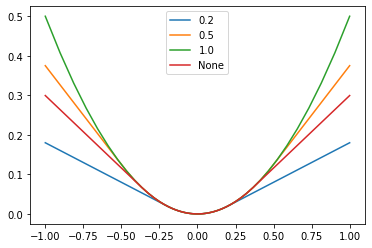

In [39]:
for delta in [0.2, 0.5, 1.0, None]:   
    huber_loss = compute_huber_loss(torch.linspace(-1, 1, 100) ** 5, torch.zeros(100), reduction='none', delta=delta)
    plt.plot(torch.linspace(-1, 1, 100) ** 5, huber_loss, label=str(delta))
plt.legend()
plt.show()

In [ ]:
What is the research environment? Do people work on what they want? 